In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from scipy.stats import skew

In [2]:
housing_train_data = pd.read_csv('train.csv')

In [3]:
housing_train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
for column in housing_train_data.columns:
    if housing_train_data[column].dtypes == 'object':
        print(housing_train_data[column].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype:

In [6]:
columns_to_drop = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']

In [7]:
housing_train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
housing_train_data.drop_duplicates(inplace=True)
housing_train_data.shape

(1460, 81)

In [9]:
housing_train_data.isna().any()[housing_train_data.isna().any()==True]

LotFrontage     True
Alley           True
MasVnrType      True
MasVnrArea      True
BsmtQual        True
BsmtCond        True
BsmtExposure    True
BsmtFinType1    True
BsmtFinType2    True
Electrical      True
FireplaceQu     True
GarageType      True
GarageYrBlt     True
GarageFinish    True
GarageQual      True
GarageCond      True
PoolQC          True
Fence           True
MiscFeature     True
dtype: bool

In [10]:
correlation = housing_train_data.corr().sort_values(by='SalePrice', ascending=False)['SalePrice']
columns_to_drop = columns_to_drop + correlation[correlation < 0.5].index.to_list()
columns_to_drop

['Alley',
 'FireplaceQu',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'Street',
 'Utilities',
 'Condition2',
 'RoofMatl',
 'Heating',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 '3SsnPorch',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'MiscVal',
 'Id',
 'LowQualFinSF',
 'YrSold',
 'OverallCond',
 'MSSubClass',
 'EnclosedPorch',
 'KitchenAbvGr']

In [11]:
housing_train_data.drop(columns_to_drop, axis=1, inplace=True)

In [12]:
categorical_columns = housing_train_data.dtypes[housing_train_data.dtypes == 'object'].index.to_list()
numerical_columns = housing_train_data.dtypes[housing_train_data.dtypes != 'object'].index.to_list()

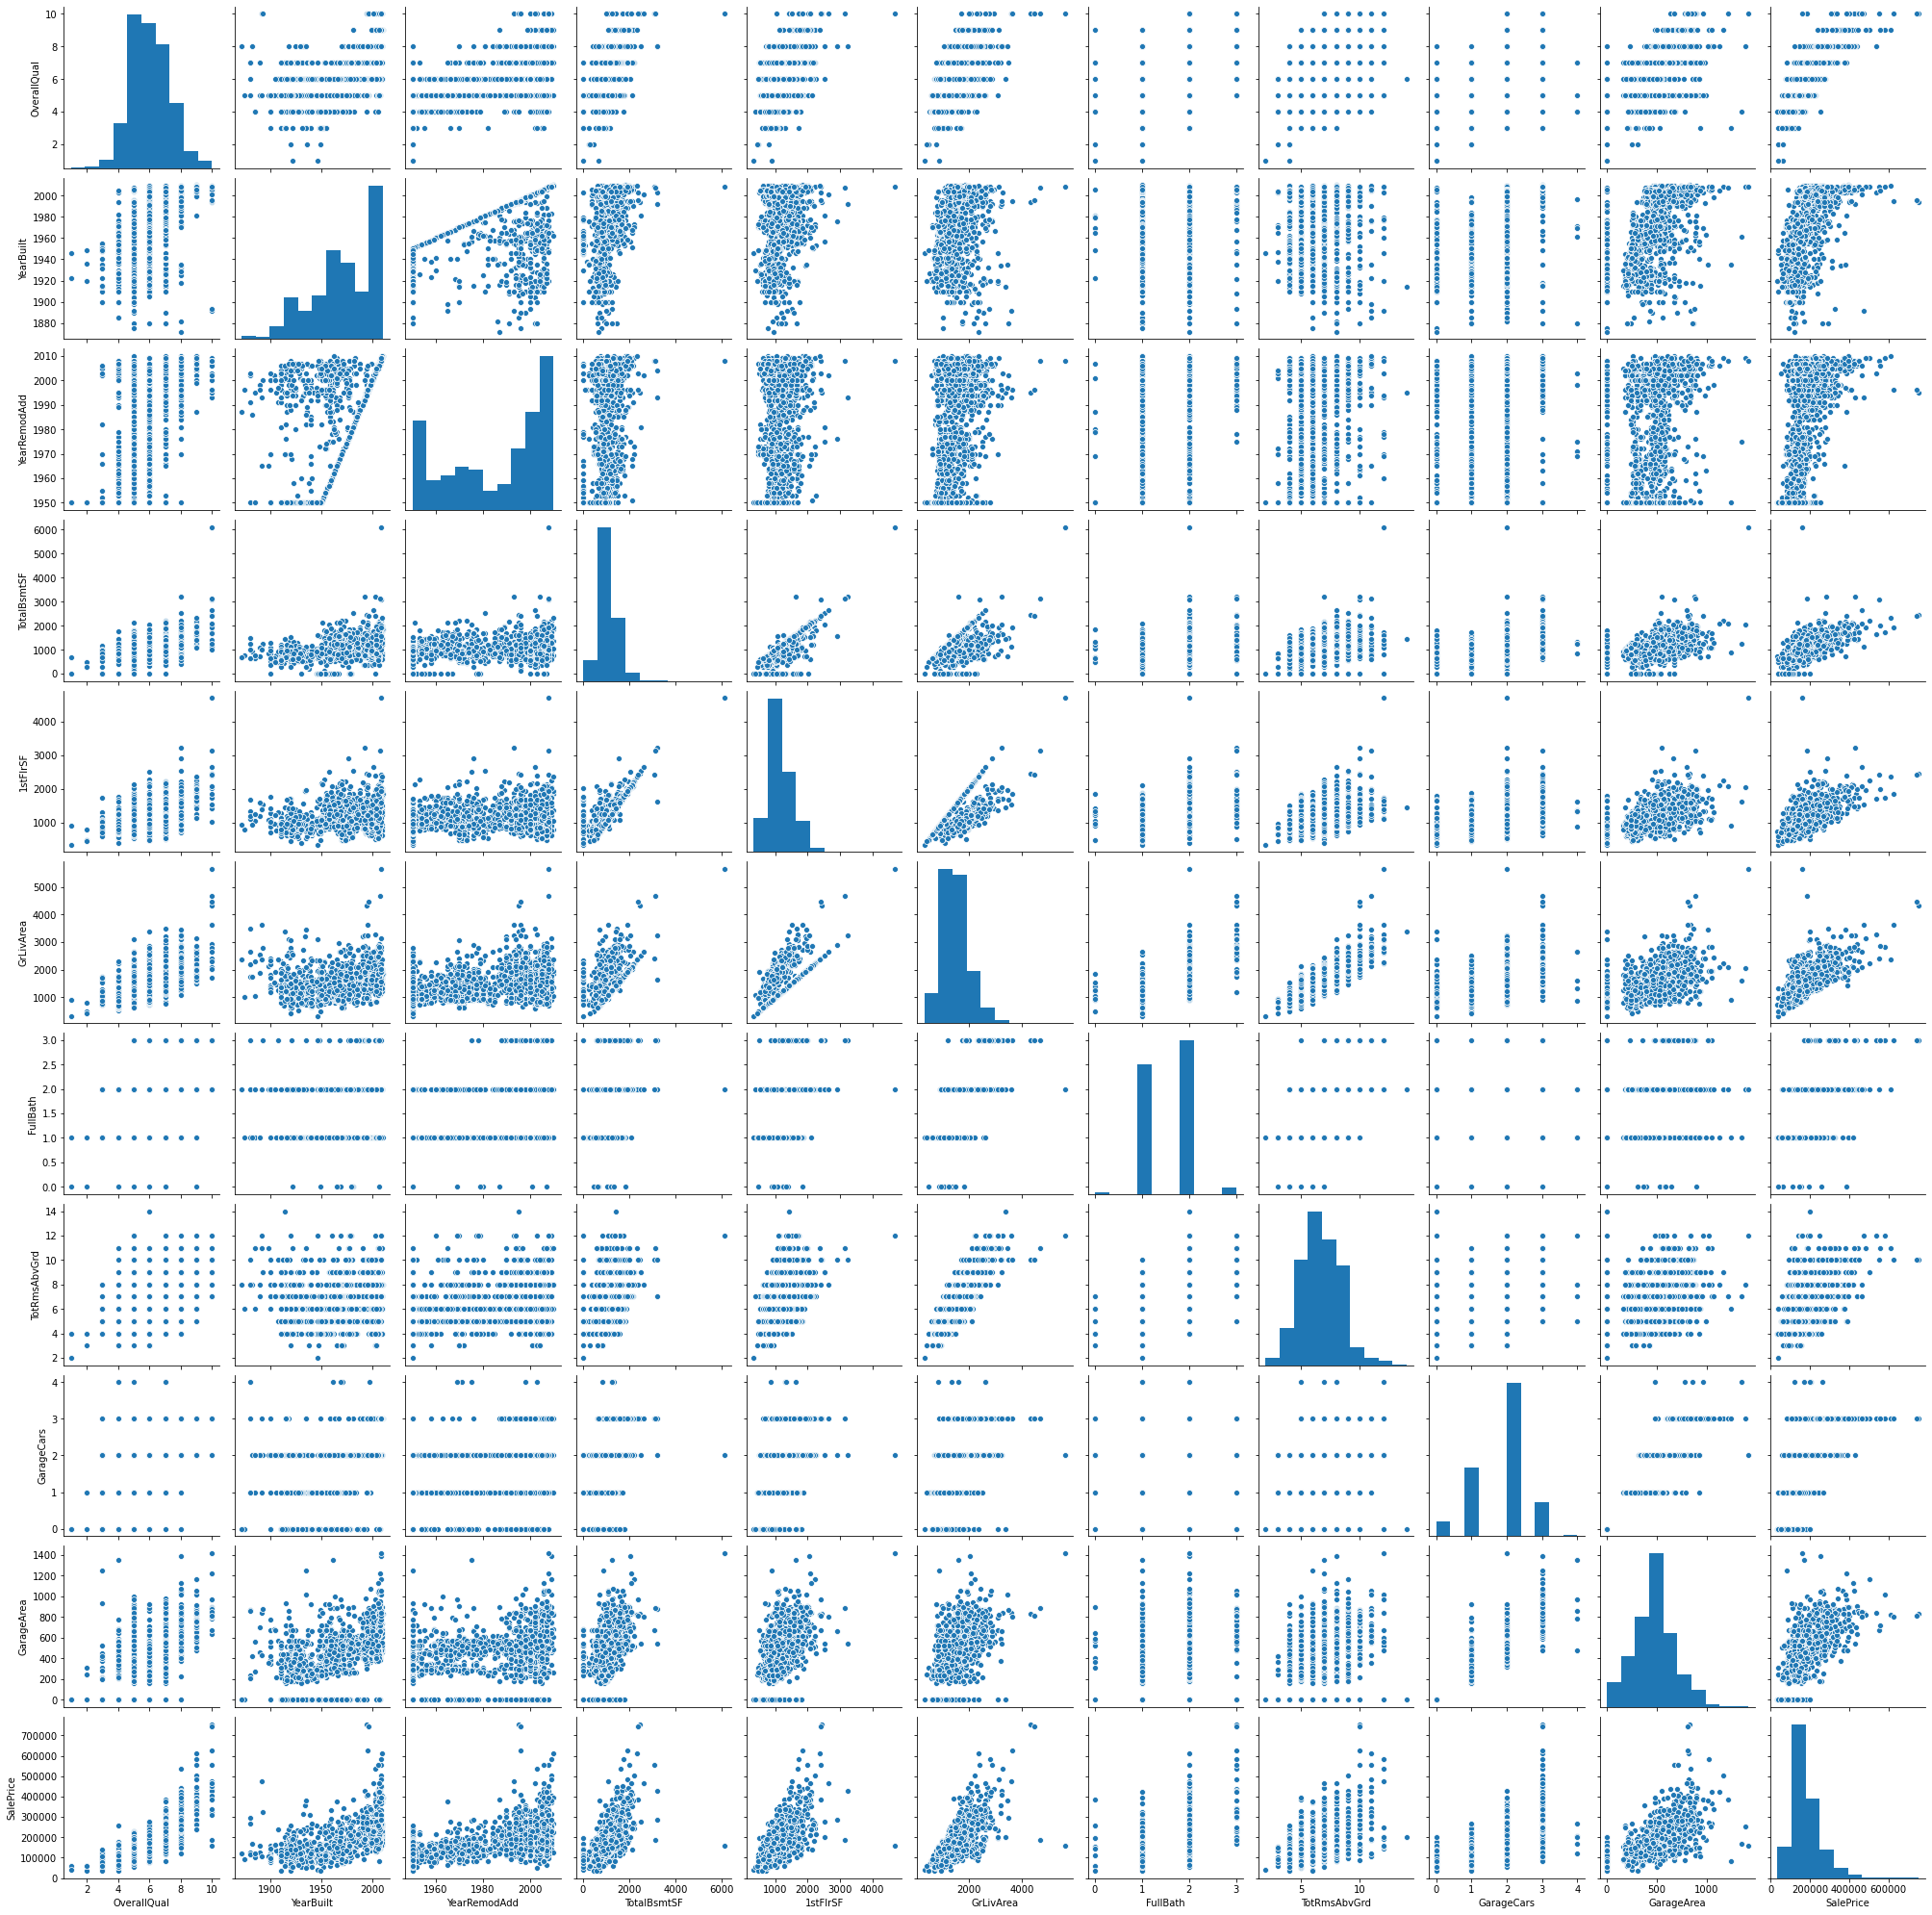

In [13]:
sns.pairplot(housing_train_data[numerical_columns])

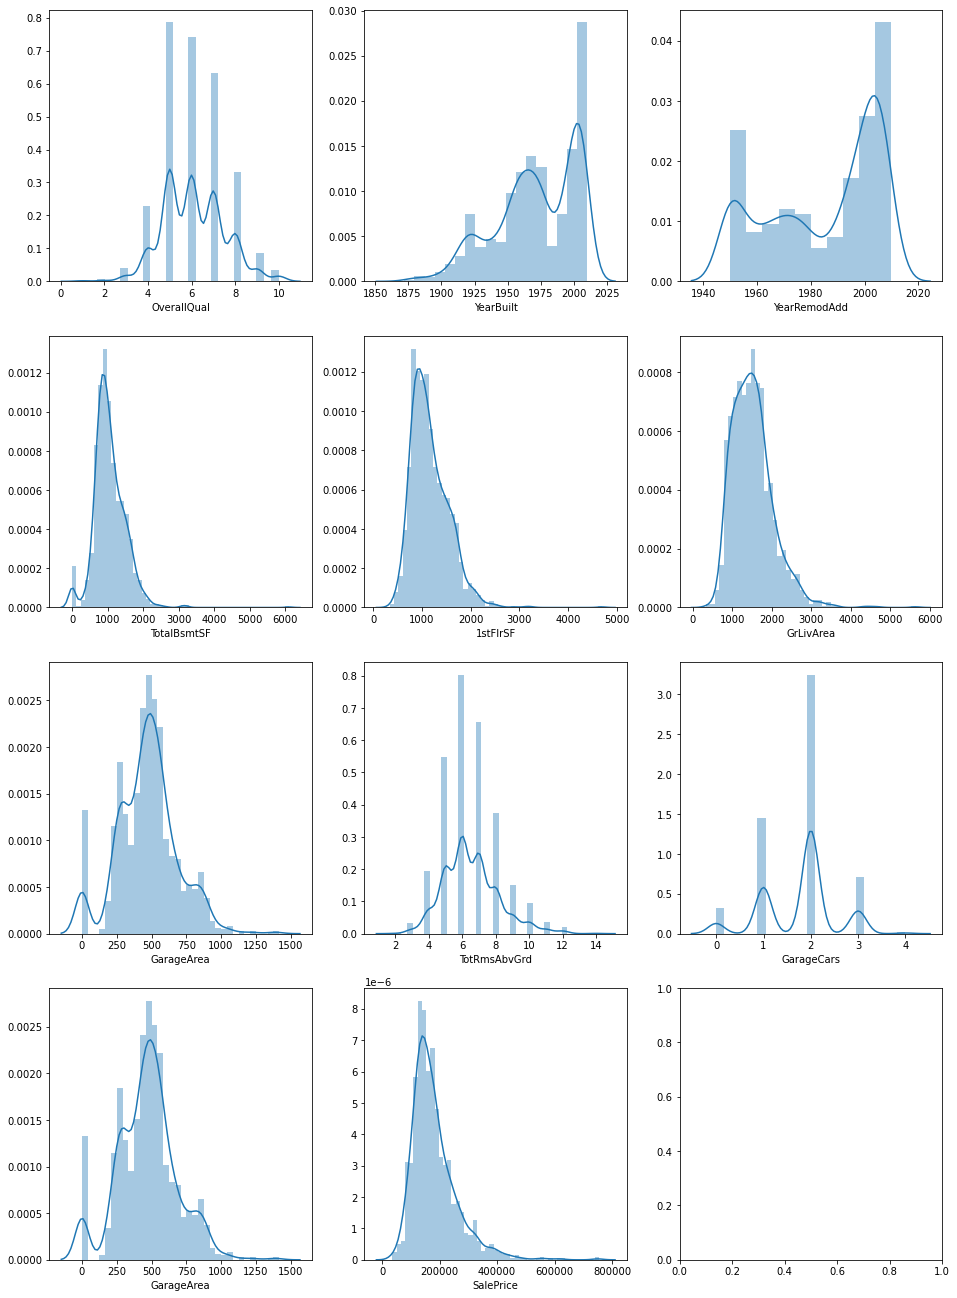

In [14]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6], [ax7, ax8, ax9], [ax10, ax11, ax12]] = plt.subplots(4, 3, figsize=(16, 23))
sns.distplot(housing_train_data[numerical_columns[0]], ax=ax1)
sns.distplot(housing_train_data[numerical_columns[1]], ax=ax2)
sns.distplot(housing_train_data[numerical_columns[2]], ax=ax3)
sns.distplot(housing_train_data[numerical_columns[3]], ax=ax4)
sns.distplot(housing_train_data[numerical_columns[4]], ax=ax5)
sns.distplot(housing_train_data[numerical_columns[5]], ax=ax6)
sns.distplot(housing_train_data[numerical_columns[9]], ax=ax7)
sns.distplot(housing_train_data[numerical_columns[7]], ax=ax8)
sns.distplot(housing_train_data[numerical_columns[8]], ax=ax9)
sns.distplot(housing_train_data[numerical_columns[9]], ax=ax10)
sns.distplot(housing_train_data[numerical_columns[10]], ax=ax11)

In [15]:
from scipy.stats import skew

for column in numerical_columns:
    print(column, skew(housing_train_data[column]))

OverallQual 0.2167209765258641
YearBuilt -0.612830724202899
YearRemodAdd -0.5030444967597948
TotalBsmtSF 1.522688086978629
1stFlrSF 1.3753417421837937
GrLivArea 1.365155954773434
FullBath 0.0365239844325461
TotRmsAbvGrd 0.6756457673102017
GarageCars -0.34219689543081294
GarageArea 0.1797959420587727
SalePrice 1.880940746034036


In [16]:
housing_train_data['SalePrice'] = np.log1p(housing_train_data['SalePrice'])

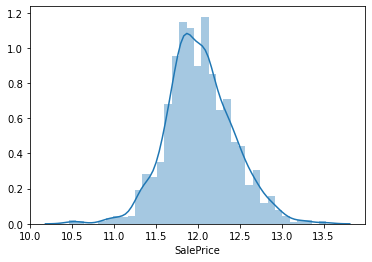

In [17]:
sns.distplot(housing_train_data['SalePrice'])

In [18]:
x = housing_train_data.drop('SalePrice', axis=1)
y = housing_train_data['SalePrice']

In [19]:
numerical_columns.remove('SalePrice')

In [20]:
numerical_processor = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('standard_scaler', StandardScaler())])
categorical_processor = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('hot_encoder', OneHotEncoder())])
t = [('categorical_processor', categorical_processor, categorical_columns), ('scale', numerical_processor, numerical_columns)]
transformer = ColumnTransformer(transformers=t)

In [21]:
pipe = Pipeline([('transformer', transformer), ('model', GradientBoostingRegressor())])
pipe.fit(x, y)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('categorical_processor',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='most_frequent',
                                     

In [22]:
#pipe.score(x_test, y_test)

In [23]:
housing_test_data = pd.read_csv('test.csv')

In [24]:
housing_test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [26]:
housing_test_data.drop(columns_to_drop, axis=1, inplace=True)
housing_test_data.drop_duplicates(inplace=True)

In [26]:
predicted_SalePrice = np.expm1(pipe.predict(housing_test_data))

C:\Users\odunt\AppData\Roaming\Python\Python38\site-packages\sklearn\compose\_column_transformer.py:427: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


In [30]:
submission = pd.DataFrame({'Id': housing_test_data['Id'], 'SalePrice':predicted_SalePrice})

In [31]:
#submission.to_csv('sixth_Submission.csv', index=False)